# Detecting Random Domain Names

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

plt.style.use('seaborn-whitegrid')

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
paths = glob.glob('../data/external/agg-alexa-entropy.gz')
column_names = ['domain', 'entropy', 'ideal_entropy']
df = pd.read_csv('../data/external/agg-alexa-entropy.gz', names=column_names)

Create a new column where entry is rounded.

In [3]:
df['entropy_rnd'] = df['entropy'].round(2)

In [4]:
df.head()

,domain,entropy,ideal_entropy,entropy_rnd
0,999.md,-0.0,1.584963,-0.0
1,www.ch,-0.0,1.584963,-0.0
2,55.cc,-0.0,1.000000,-0.0
3,j.mp,-0.0,-0.000000,-0.0
4,n.nu,-0.0,-0.000000,-0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049929 entries, 0 to 4049928
Data columns (total 4 columns):
domain           object
entropy          float64
ideal_entropy    float64
entropy_rnd      float64
dtypes: float64(3), object(1)
memory usage: 123.6+ MB


In [6]:
df[df['domain'] == 'google.com']

,domain,entropy,ideal_entropy,entropy_rnd
122526,google.com,1.918296,2.584963,1.92


## Filter out IDNs

In [7]:
df_filtered = df[~df['domain'].str.startswith('xn--')]

In [8]:
df_filtered.describe()

,entropy,ideal_entropy,entropy_rnd
count,4.036467e+06,4.036467e+06,4.036467e+06
mean,2.913804e+00,3.367798e+00,2.913679e+00
std,5.125407e-01,6.541539e-01,5.127448e-01
min,-0.000000e+00,-0.000000e+00,-0.000000e+00
25%,2.584963e+00,3.000000e+00,2.580000e+00
50%,2.947703e+00,3.321928e+00,2.950000e+00
75%,3.272906e+00,3.807355e+00,3.270000e+00
max,4.700440e+00,6.129283e+00,4.700000e+00


In [9]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4036467 entries, 0 to 4049907
Data columns (total 4 columns):
domain           object
entropy          float64
ideal_entropy    float64
entropy_rnd      float64
dtypes: float64(3), object(1)
memory usage: 154.0+ MB


In [10]:
print('Number of IDNs: %s' % (df.shape[0] - df_filtered.shape[0]))

Number of IDNs: 13462


In [11]:
df_filtered['entropy'].min()

-0.0

In [12]:
df_filtered['entropy'].max()

4.7004397181400002

In [13]:
df_filtered[df_filtered['entropy'] > 2.3].head(10)

,domain,entropy,ideal_entropy,entropy_rnd
481502,breederretriever.com,2.305037,4.000000,2.31
481503,toottoottoys.com.au,2.305037,4.000000,2.31
481504,lesfeestisseuses.com,2.305037,4.000000,2.31
481505,o31ngo31ngo31n.top,2.305958,3.807355,2.31
481506,gora-gora-gora.com,2.305958,3.807355,2.31
481507,line-line-line.com,2.305958,3.807355,2.31
481508,caesarscareers.jobs,2.305958,3.807355,2.31
481509,amor-amor-amor.com,2.305958,3.807355,2.31
481510,tori-tori-tori.com,2.305958,3.807355,2.31
481511,o31bgo31bgo31b.top,2.305958,3.807355,2.31


In [14]:
dist_df = df.groupby(['entropy_rnd'])['domain'].count()

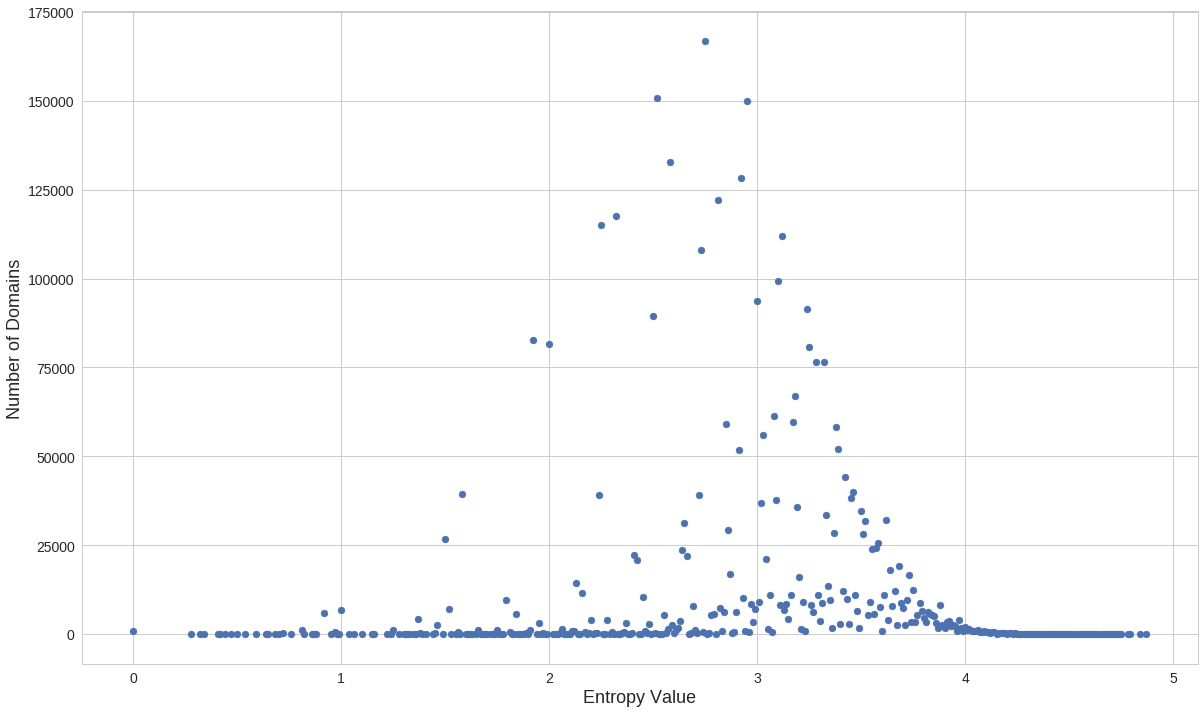

In [15]:
X = dist_df.index
Y = dist_df.values

fig, ax = plt.subplots(figsize=(20, 12))
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Entropy Value')
ax.set_ylabel('Number of Domains')
ax.scatter(X, Y)

In [16]:
df_filtered[df_filtered['entropy'] > 4.2].sample(5)

,domain,entropy,ideal_entropy,entropy_rnd
4047850,afternoon-island-6275.herokuapp.com,4.235981,4.954196,4.24
4047746,weatherman-resources-17885.bitballoon.com,4.229327,5.209453,4.23
4048055,hypnotizedgirlsfan.tumblr.com,4.243856,4.643856,4.24
4049652,surgeon-jack-80562.netlify.com,4.469670,4.700440,4.47
4048719,rmetgarrpiouttmwqtuajcnzgesgozrihrzwmjlpxvcnmd...,4.294177,5.643856,4.29


In [17]:
df_filtered[df_filtered['entropy'] > 3.9].head(10)

,domain,entropy,ideal_entropy,entropy_rnd
4009483,membrosafiliadosunidos.blogspot.com.br,3.900153,5.129283,3.9
4009484,josephsdailywalkwithjesus.wordpress.com,3.900153,5.129283,3.9
4009485,lesreceptesquemagraden.blogspot.com.es,3.900153,5.129283,3.9
4009486,trinity-audio-engineering.myshopify.com,3.900153,5.129283,3.9
4009487,personalizaciondeblogs.blogspot.com.br,3.900153,5.129283,3.9
4009488,compartilhando-adilson.blogspot.com.br,3.900153,5.129283,3.9
4009489,atividadesparamaternal.blogspot.com.br,3.900153,5.129283,3.9
4009490,personalizaciondeblogs.blogspot.com.es,3.900153,5.129283,3.9
4009491,elektrische-zigarettenstopfmaschine.com,3.900153,5.129283,3.9
4009492,thebigandsofisticatedforupdatingnew.bid,3.900153,5.129283,3.9
